<a href="https://colab.research.google.com/github/mk7890/Python_Data_Analysis/blob/main/Google_Play_Store_Apps__Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Google Play store Apps dataset from kaggle

In [275]:
!kaggle datasets download -d lava18/google-play-store-apps

Dataset URL: https://www.kaggle.com/datasets/lava18/google-play-store-apps
License(s): unknown
google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [276]:
import zipfile
zipfile_path = '/content/google-play-store-apps.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


# Import necessary libraries and load the dataset

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [278]:
gpsApps = pd.read_csv('/content/googleplaystore.csv')
gpsAppsReviews = pd.read_csv('/content/googleplaystore_user_reviews.csv')
gpsApps.head() # preview the first 5 records(rows) in the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [279]:
gpsAppsReviews.head() # preview the first 5 records(rows) in the dataset (reviews)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Getting to understand the dataset

In [280]:
gpsApps.info() # get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [281]:
gpsAppsReviews.info() # get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [282]:
gpsApps.shape # get the number of rows and columns in the dataset

(10841, 13)

In [283]:
gpsAppsReviews.shape # get the number of rows and columns in the dataset

(64295, 5)

In [284]:
gpsApps.columns # get the column names in the dataset

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [285]:
gpsAppsReviews.columns # get the column names in the dataset

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [286]:
gpsApps.isnull().sum() # check for missing values in the dataset

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Plot missingno

<Axes: >

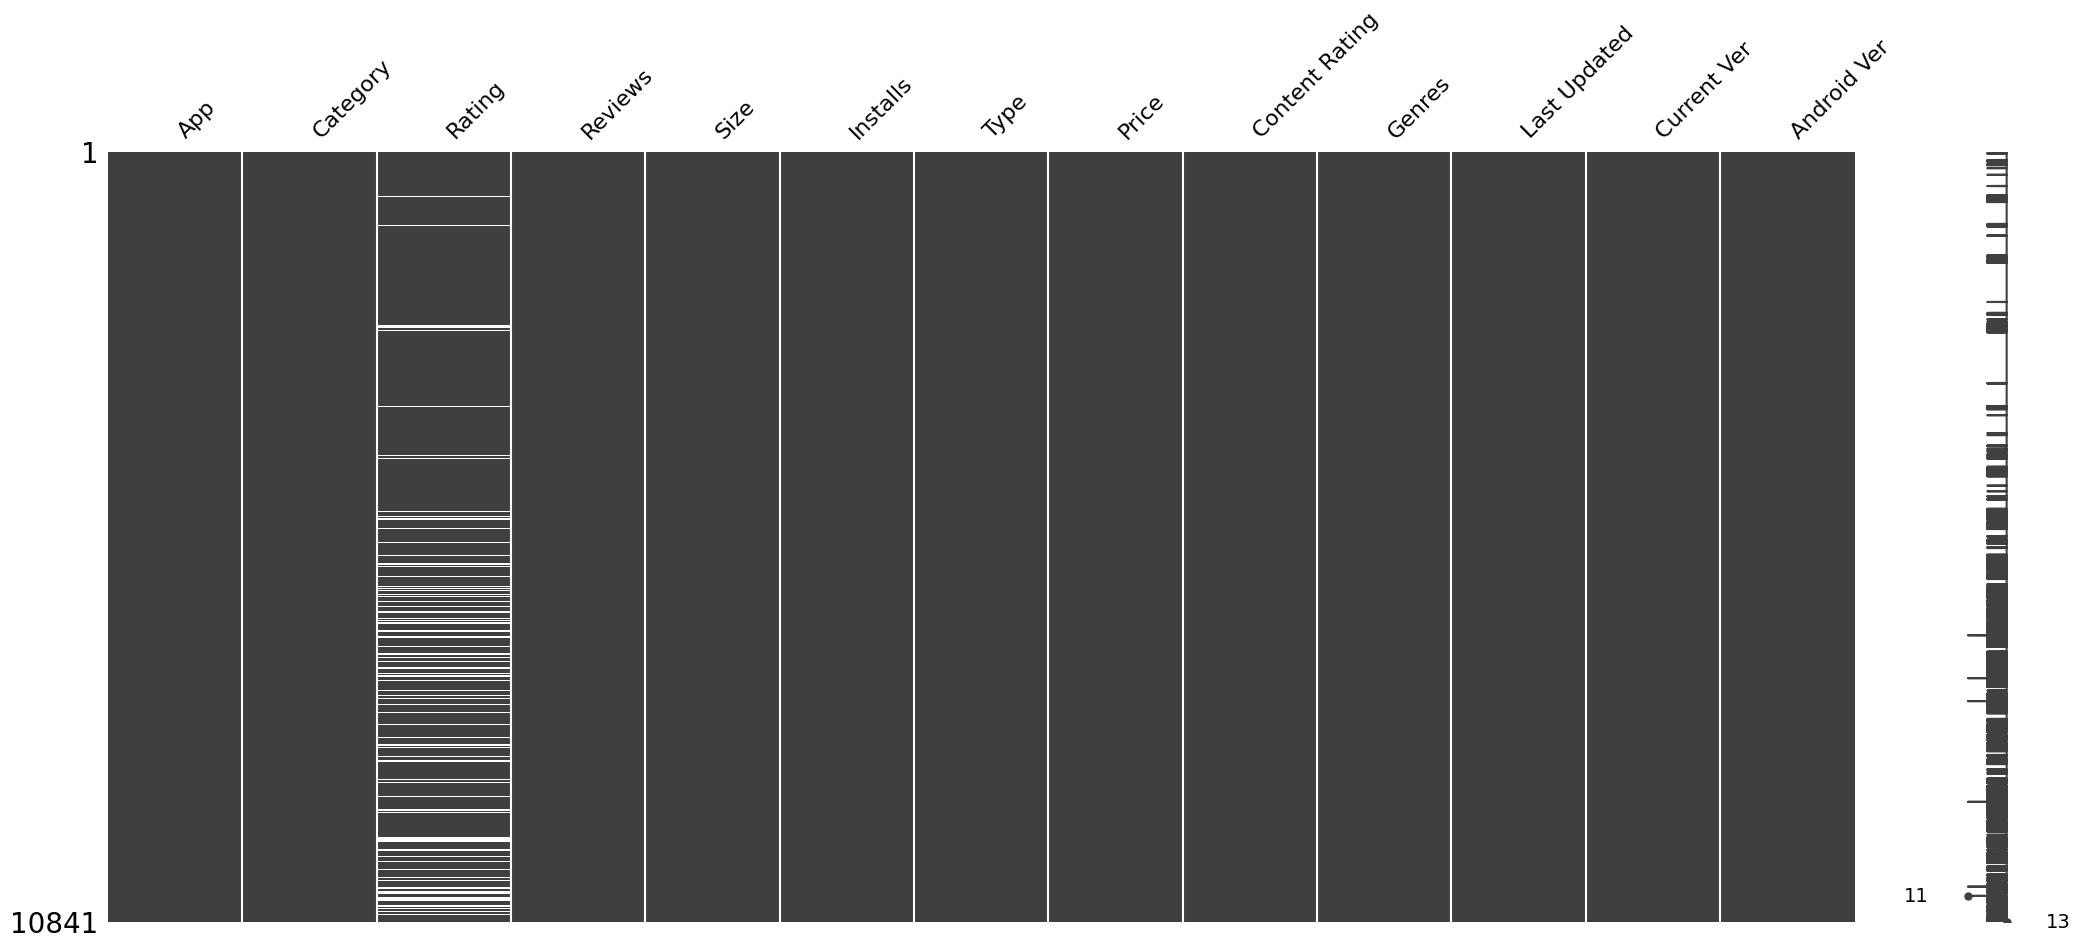

In [287]:
# missingno for gpsApps
msno.matrix(gpsApps)

Plot a histogram for the Rating column and visually inspect the data for cleaning

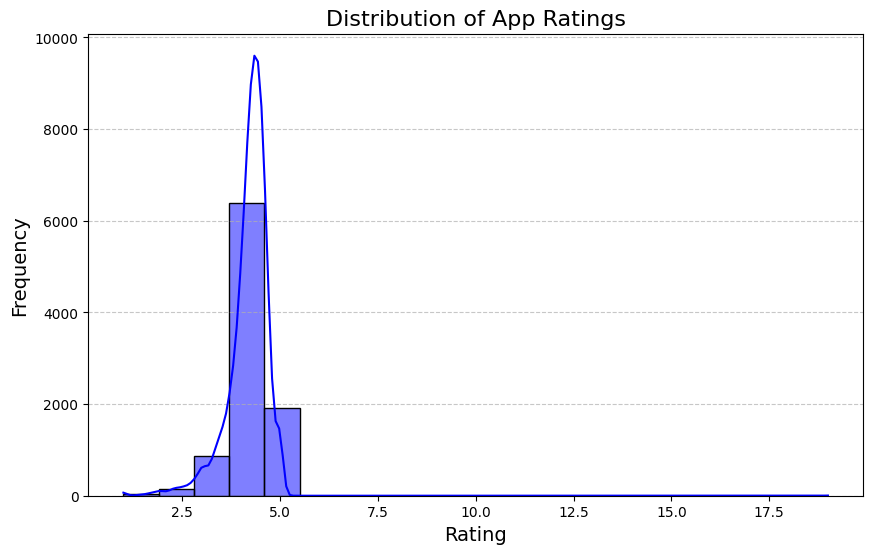

In [288]:
# plot histogram distribution for rating column on gpsApps
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=gpsApps, x='Rating', bins=20, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Remove rows where ratings are outside the valid range.
python
Copy code


In [289]:
#gpsApps = gpsApps[gpsApps['Rating'].between(1.0, 5.0)]
# Force 'Rating' values to be within the range [1, 5]
gpsApps['Rating'] = gpsApps['Rating'].clip(lower=1, upper=5)


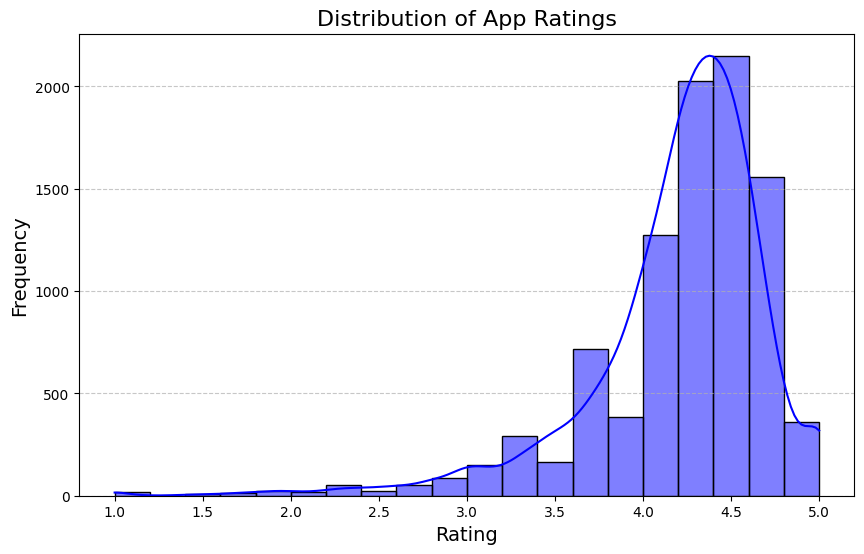

In [290]:
# plot histogram distribution for rating column on gpsApps
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=gpsApps, x='Rating', bins=20, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Handle Missing Values: use median

In [291]:
gpsApps['Rating'].fillna(gpsApps['Rating'].median(), inplace=True)

<ipython-input-291-4a10f437b828>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gpsApps['Rating'].fillna(gpsApps['Rating'].median(), inplace=True)


In [292]:
gpsApps.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [293]:
gpsApps['Current Ver'].value_counts()

,count
Current Ver,
Varies with device,1459
1.0,809
1.1,264
1.2,178
2.0,151
...,...
1.0.17.3905,1
15.1.2,1
4.94.19,1


In [294]:
# drop Current Ver column
gpsApps.drop('Current Ver', axis=1, inplace=True)

In [295]:
# fill 'Android Ver' column with mode
gpsApps['Android Ver'].fillna(gpsApps['Android Ver'].mode()[0], inplace=True)

<ipython-input-295-b93317981984>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gpsApps['Android Ver'].fillna(gpsApps['Android Ver'].mode()[0], inplace=True)


In [296]:
gpsApps['Type'].value_counts()

,count
Type,
Free,10039
Paid,800
0,1


In [297]:
gpsApps['Content Rating'].value_counts()

,count
Content Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


In [298]:
# fill missing values in 'Type' and 'Content Rating' columns with mode
gpsApps['Type'].fillna(gpsApps['Type'].mode()[0], inplace=True)
gpsApps['Content Rating'].fillna(gpsApps['Content Rating'].mode()[0], inplace=True)

<ipython-input-298-2cc7ca749a0c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gpsApps['Type'].fillna(gpsApps['Type'].mode()[0], inplace=True)
<ipython-input-298-2cc7ca749a0c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [299]:
gpsApps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Android Ver'],
      dtype='object')

In [300]:
# Function to get app names under a specific category
def get_apps_by_category(dataframe, category_name):
    filtered_apps = dataframe[dataframe['Category'] == category_name]['App']
    return filtered_apps.tolist()  # Convert the result to a list

# Example usage: Get apps in the 'Education' category
category_name = '1.9'
apps_in_category = get_apps_by_category(gpsApps, category_name)

# Display the result
print(f"Apps in the '{category_name}' category:")
print(apps_in_category)


Apps in the '1.9' category:
['Life Made WI-Fi Touchscreen Photo Frame']


In [301]:
# Function to drop a specific category
def drop_category(dataframe, category_name):
    return dataframe[dataframe['Category'] != category_name]

# Example usage: Drop the 'Education' category
category_to_drop = '1.9'
df_apps_filtered = drop_category(gpsApps, category_to_drop)

# Display the result
print(f"Rows after dropping the '{category_to_drop}' category:")
df_apps_filtered['Category'].value_counts()
gpsApps = df_apps_filtered


Rows after dropping the '1.9' category:


In [302]:
gpsApps.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


# Let's clean google play store apps review dataset

In [303]:
gpsAppsReviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [304]:
# drop rows in gpsAppsreview with Nan values in 'Translated_Review' column
gpsAppsReviews.dropna(subset=['Translated_Review'], inplace=True)

In [305]:
gpsAppsReviews.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


# merge the two datasets to creat a new dataset

In [306]:
gpsAppsReviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [307]:
# Step 1: Drop the columns 'Translated_Review' and 'Sentiment'
gpsAppsReviews_dropped = gpsAppsReviews.drop(columns=['Translated_Review', 'Sentiment'])

# Step 2: Group by 'App' and calculate the mean for 'Sentiment_Polarity' and 'Sentiment_Subjectivity'
gpsAppsReviews_means = gpsAppsReviews_dropped.groupby('App')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean().reset_index()

# Step 3: The result is a new DataFrame with the average sentiment for each app
gpsAppsReviews_means


,App,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
2,11st,0.185943,0.455340
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.196290,0.557315
...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.101622,0.545444
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
862,Hotstar,0.038178,0.493964
863,Hotwire Hotel & Car Rental App,0.187029,0.459717


In [329]:
# Merge the datasets on the 'App' column
gpsAppsCombined = pd.merge(gpsApps, gpsAppsReviews_means, on='App', how='inner')  # 'inner' keeps only matching records
# Check the result
gpsAppsCombined.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",3.0 and up,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",4.0.3 and up,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,0.0,Everyone,Art & Design,"March 20, 2018",4.0.3 and up,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",4.0.3 and up,0.171836,0.572762


# Data Visualization and analysis

# Compare populatiy of Free vs Paid Apps

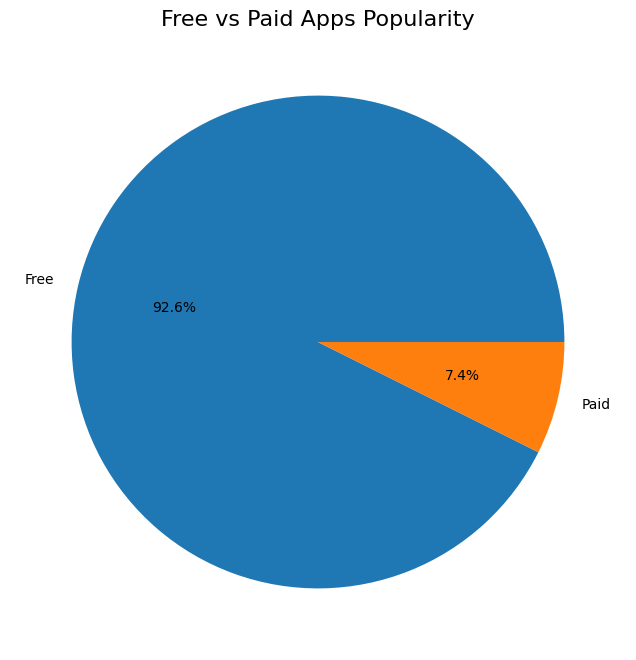

In [309]:
# Compare populatiy of Free vs Paid Apps in gpsApps dataset
freeVpaid = gpsApps['Type'].value_counts() # Count the number of Free and Paid a
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for Free and Paid
plt.pie(freeVpaid, labels=freeVpaid.index, autopct='%1.1f%%', colors=colors,
)
plt.title('Free vs Paid Apps Popularity', fontsize=16) # Add a title
plt.show() # Display the chart


The pie chart illustrates the share of free and paid apps available on the Google Play Store. Majority of the apps are free, making up a significant share of the market. This indicates that developers largely rely on in-app purchases and advertisements for revenue instead of charging an upfront fee as it might be prohibitive and lead to less downloads. Specifically, 92.6% of the apps are Free, while only 7.4% are Paid.

# Exploration of the most popular Categories

In [310]:
gpsApps['Category'].value_counts()

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


<ipython-input-311-bebbeeb88c4a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


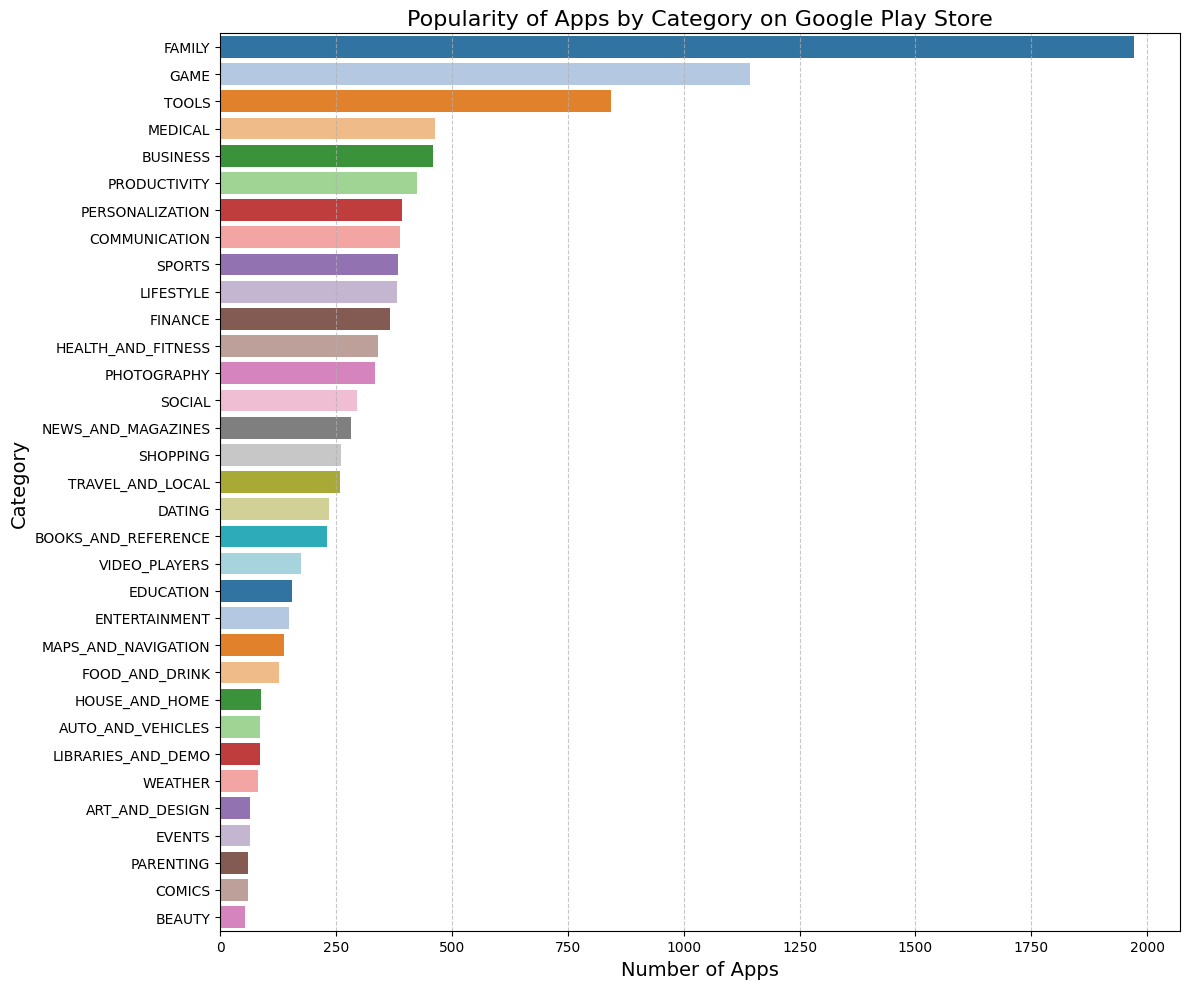

In [311]:
# Count the number of apps in each category
gpsApps_category = gpsApps['Category'].value_counts()

# Create a color palette with unique colors for each category
palette = sns.color_palette("tab20", n_colors=len(gpsApps_category))

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(
    x=gpsApps_category.values,
    y=gpsApps_category.index,
    palette=palette
)

# Add labels and title
plt.title('Popularity of Apps by Category on Google Play Store', fontsize=16)
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


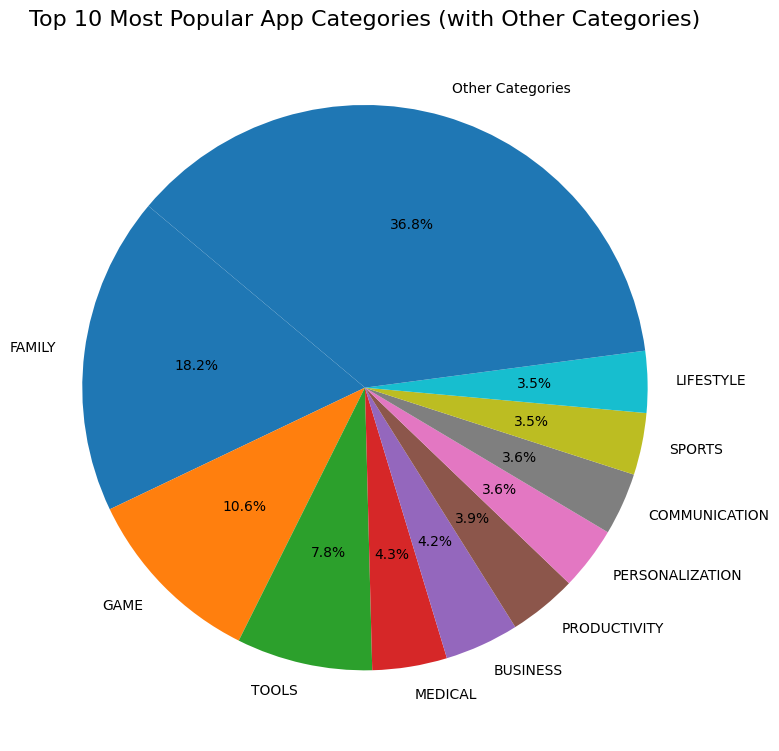

In [312]:
# Count the number of occurrences of each category
category_counts = gpsApps['Category'].value_counts()
# Separate the top 10 categories
top_categories = category_counts.head(10)
# Sum the rest into "Other Categories"
other_categories_count = category_counts.iloc[10:].sum()
categories_with_other = pd.concat(
    [top_categories, pd.Series({'Other Categories': other_categories_count})]
)
# Calculate percentages relative to all entries
total_apps = category_counts.sum()
category_percentages = (categories_with_other / total_apps) * 100
# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = plt.get_cmap("tab10").colors  # Get a color palette
plt.pie(
    category_percentages,
    labels=category_percentages.index,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    colors=colors[:len(categories_with_other)],  # Ensure color palette matches the data
)
# Add a title
plt.title('Top 10 Most Popular App Categories (with Other Categories)', fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()


A pie chart was utilized to depict the distribution of the most popular app categories on Google Play. This visualization highlighted the dominant genres among apps, providing valuable insights for developers choosing a genre for their next application. The chart reveals that "Family" is the most popular category, accounting for 18.2% of the market. "Game" and "Tools" follow as the second and third most popular categories, representing 10.6% and 7.8% of the market, respectively.

# Least popular app Categories

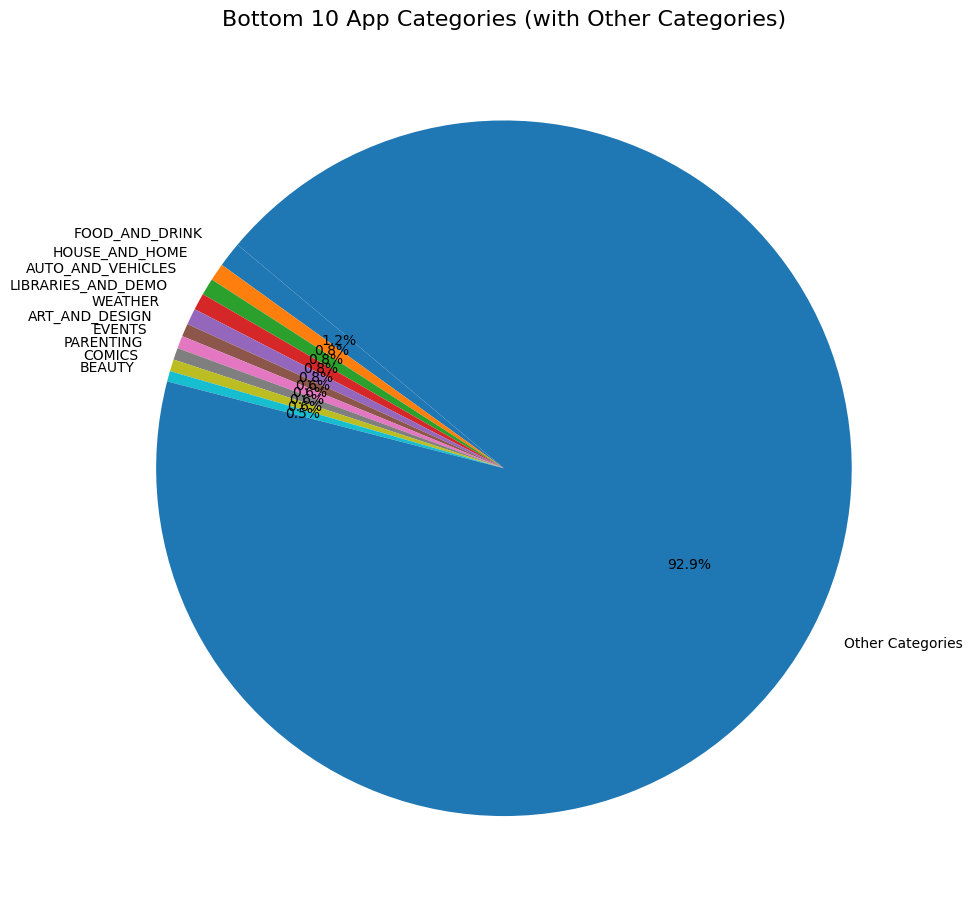

In [313]:
# Count the number of occurrences of each category
category_counts = gpsApps['Category'].value_counts()
# Separate the bottom 10 categories
bottom_categories = category_counts.tail(10)
# Sum the top categories into "Other Categories"
other_categories_count = category_counts.iloc[:-10].sum()
categories_with_other = pd.concat(
    [bottom_categories, pd.Series({'Other Categories': other_categories_count})]
)
# Calculate percentages relative to all entries
total_apps = category_counts.sum()
category_percentages = (categories_with_other / total_apps) * 100
# Plotting the pie chart
plt.figure(figsize=(10, 10))
colors = plt.get_cmap("tab10").colors  # Get a color palette
plt.pie(
    category_percentages,
    labels=category_percentages.index,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    colors=colors[:len(categories_with_other)],  # Ensure color palette matches the data
)
# Add a title
plt.title('Bottom 10 App Categories (with Other Categories)', fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()


# Most Popular Apps in the “Family” Category

In [314]:
gpsApps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Android Ver'],
      dtype='object')

In [315]:
gpsApps['Category'].value_counts()

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


<ipython-input-316-7d138169d885>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_apps['Installs'] = family_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)


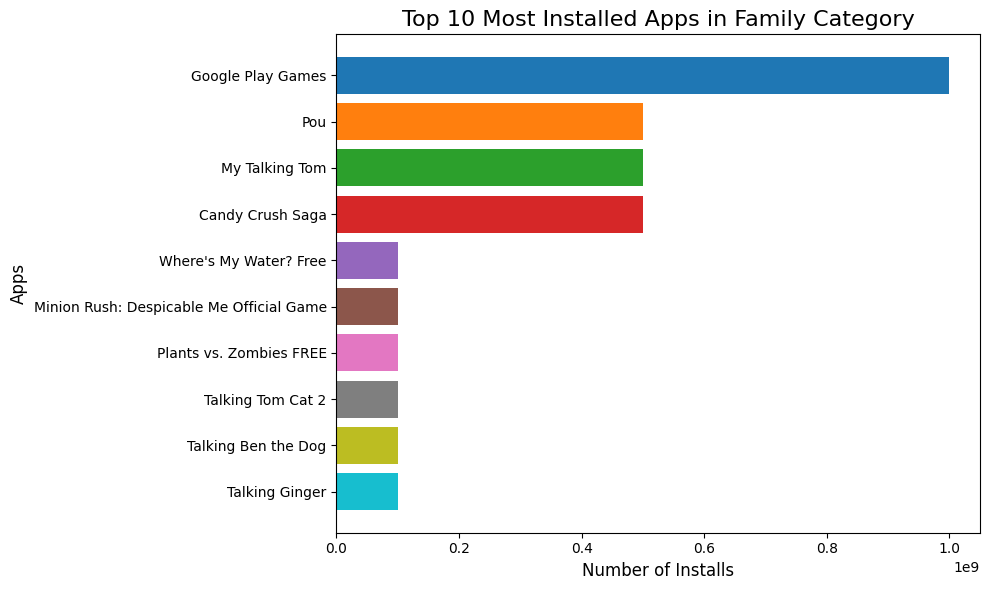

In [316]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Step 1: Filter for "Family" category apps
family_apps = gpsApps[gpsApps['Category'] == 'FAMILY']

# Step 2: Convert 'Installs' column to numeric (remove commas and '+' if necessary)
family_apps['Installs'] = family_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Step 3: Sort apps by installs and select the top 10
top_family_apps = family_apps.sort_values(by='Installs', ascending=False).head(10)

# Step 4: Create a color palette for the bars
colors = plt.cm.tab10.colors[:len(top_family_apps)]  # Use tab10 color palette: others--> plt.cm.viridis.colors, plt.cm.Set2.colors, plt.cm.tab10.colors
#colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow'] # manual color map

# Step 5: Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_family_apps['App'], top_family_apps['Installs'], color=colors)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('Apps', fontsize=12)
plt.title('Top 10 Most Installed Apps in Family Category', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


The plot above displays the most installed apps in the “Family” category. This information is crucial for developers focusing on family-oriented apps to understand the competition and the user preferences in this category.

<ipython-input-317-d87a8478595e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_paid_apps['Installs'] = family_paid_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)


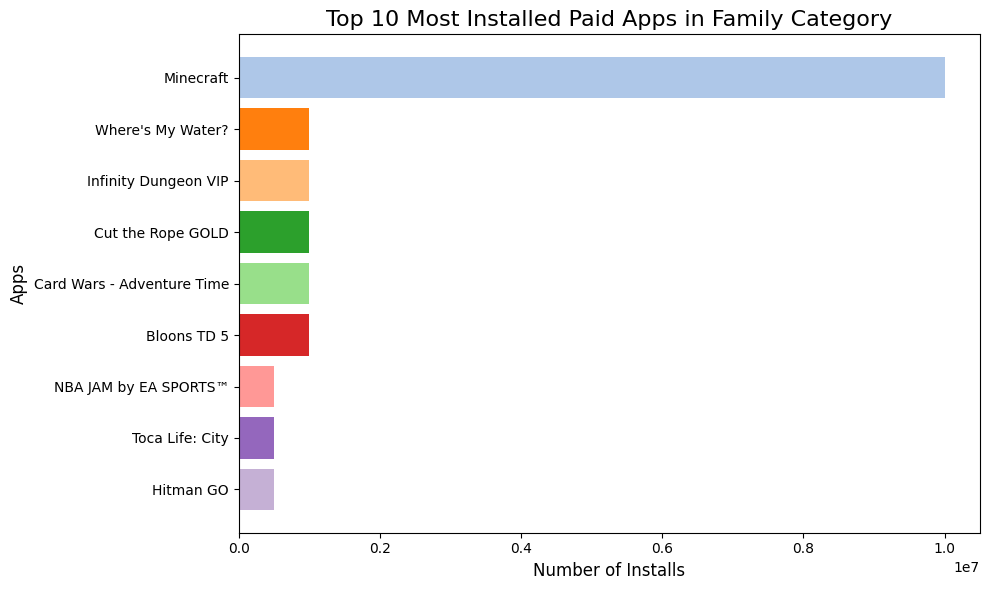

In [317]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Step 1: Filter for "Family" category and "Paid" type apps
family_paid_apps = gpsApps[(gpsApps['Category'] == 'FAMILY') & (gpsApps['Type'] == 'Paid')]

# Step 2: Convert 'Installs' column to numeric (remove commas and '+' if necessary)
family_paid_apps['Installs'] = family_paid_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Step 3: Sort apps by installs and select the top 10
top_family_paid_apps = family_paid_apps.sort_values(by='Installs', ascending=False).head(10)

# Step 4: Create a color palette for the bars
colors = plt.cm.tab20.colors[:len(top_family_paid_apps)]  # Use tab20 color palette

# Step 5: Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_family_paid_apps['App'], top_family_paid_apps['Installs'], color=colors)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('Apps', fontsize=12)
plt.title('Top 10 Most Installed Paid Apps in Family Category', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


Plot above provides information specifically on the most installed paid apps on the Family Category.

It can be seen from both charts that there are some apps that make up the most number of installations for the “Family” category (one billion downloads of Google Play Games in Free sector, ten million downloads of Minecraft in Paid sector), while the average installation rates are slightly lower.

# Comparison of the number of Installations per Category

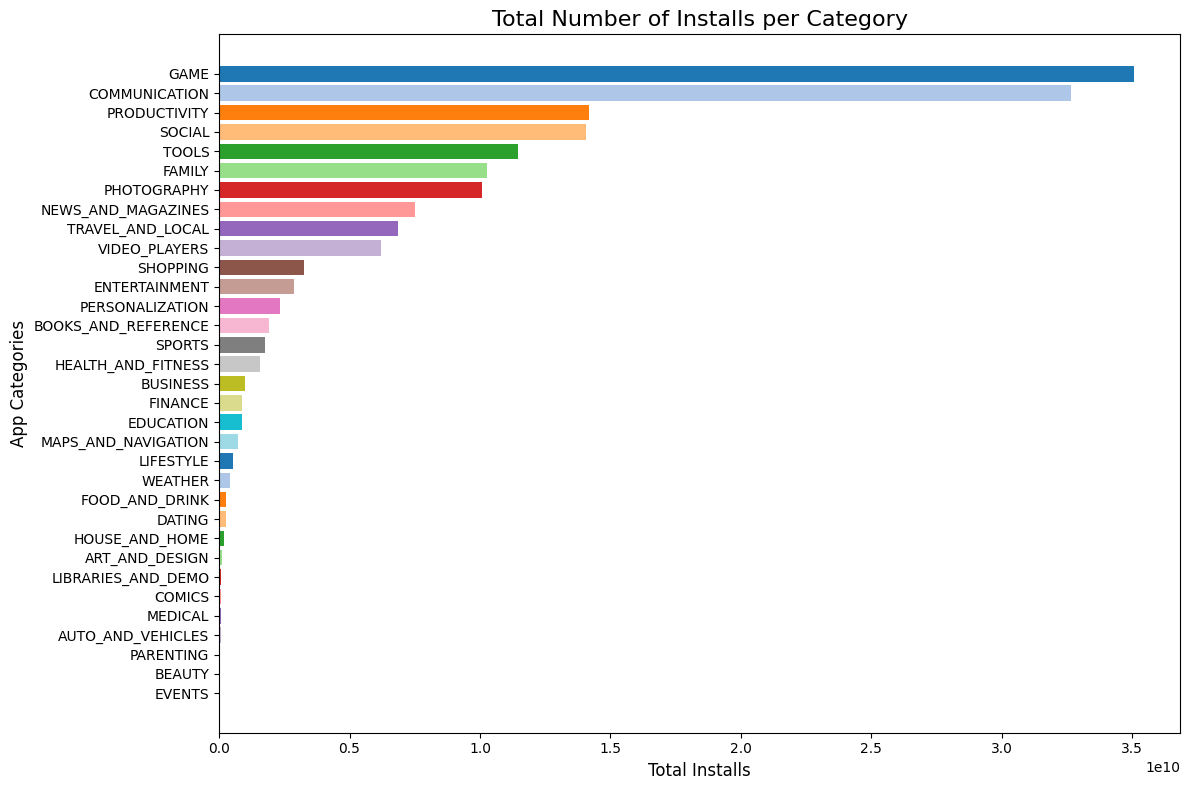

In [318]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Step 1: Convert 'Installs' column to numeric (remove commas and '+' if necessary)
gpsApps['Installs'] = gpsApps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Step 2: Group by 'Category' and sum the 'Installs'
category_installs = gpsApps.groupby('Category')['Installs'].sum()

# Step 3: Sort the categories by the total installs in descending order
category_installs_sorted = category_installs.sort_values(ascending=False)

# Step 4: Generate a color palette
colors = plt.cm.tab20.colors[:len(category_installs_sorted)]  # Use tab20 color palette

# Step 5: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(category_installs_sorted.index, category_installs_sorted.values, color=colors)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('App Categories', fontsize=12)
plt.title('Total Number of Installs per Category', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


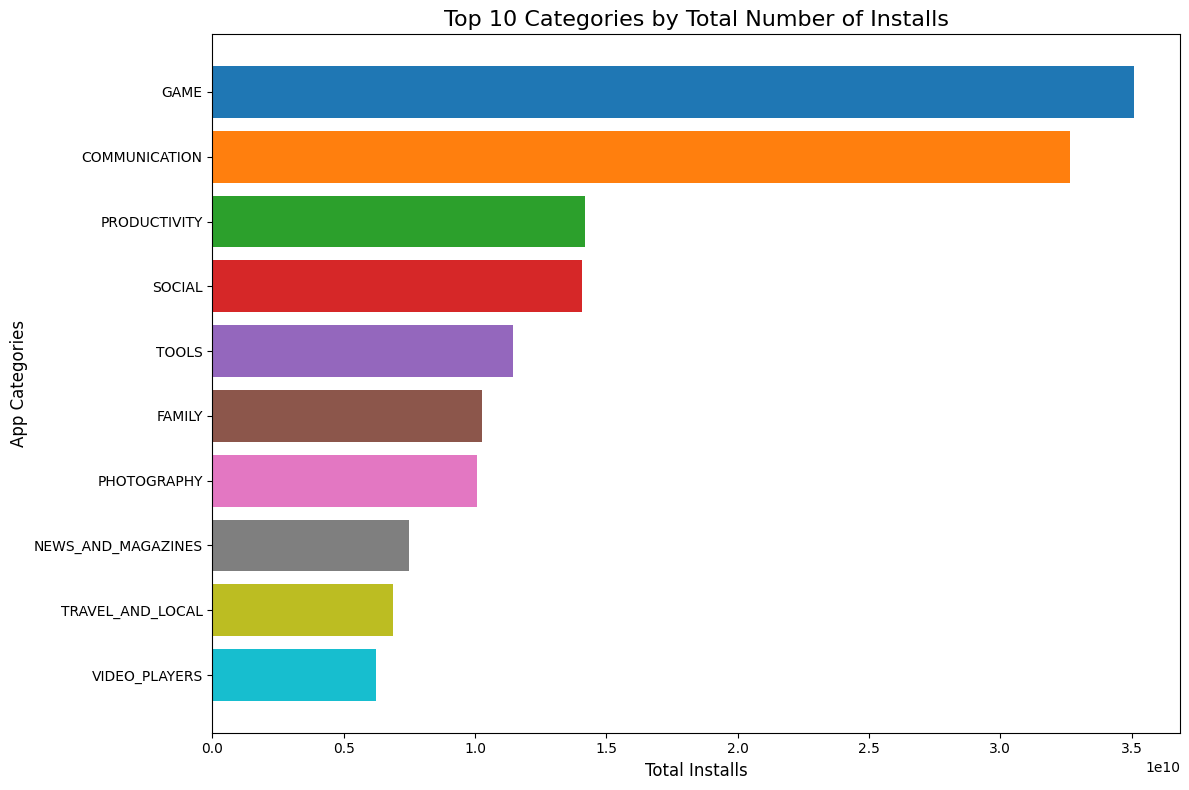

In [319]:
# Step 1: Convert 'Installs' column to string (in case it's not already)
gpsApps['Installs'] = gpsApps['Installs'].astype(str)

# Step 2: Remove commas and '+' symbols from the 'Installs' column
gpsApps['Installs'] = gpsApps['Installs'].str.replace('[+,]', '', regex=True)

# Step 3: Convert 'Installs' column back to numeric (integer type)
gpsApps['Installs'] = pd.to_numeric(gpsApps['Installs'], errors='coerce')

# Step 4: Group by 'Category' and sum the 'Installs'
category_installs = gpsApps.groupby('Category')['Installs'].sum()

# Step 5: Sort the categories by the total installs in descending order and select the top 10
category_installs_sorted = category_installs.sort_values(ascending=False).head(10)

# Step 6: Generate a color palette for the top 10 categories
colors = plt.cm.tab10.colors[:len(category_installs_sorted)]  # Use tab10 color palette

# Step 7: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(category_installs_sorted.index, category_installs_sorted.values, color=colors)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('App Categories', fontsize=12)
plt.title('Top 10 Categories by Total Number of Installs', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


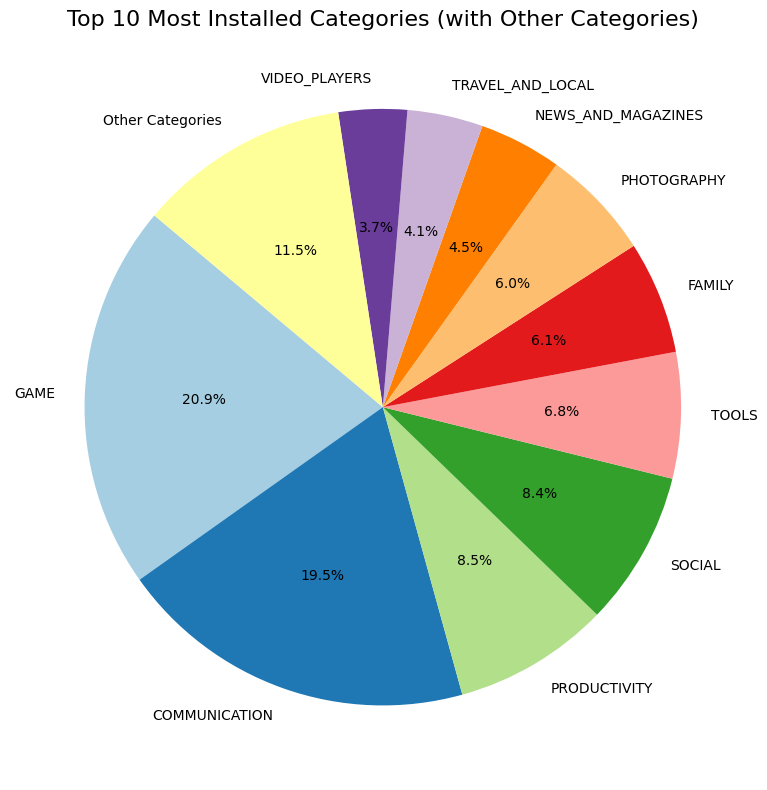

In [320]:
# Step 1: Convert 'Installs' column to string (in case it's not already)
gpsApps['Installs'] = gpsApps['Installs'].astype(str)

# Step 2: Remove commas and '+' symbols from the 'Installs' column
gpsApps['Installs'] = gpsApps['Installs'].str.replace('[+,]', '', regex=True)

# Step 3: Convert 'Installs' column back to numeric (integer type)
gpsApps['Installs'] = pd.to_numeric(gpsApps['Installs'], errors='coerce')

# Step 4: Group by 'Category' and sum the 'Installs'
category_installs = gpsApps.groupby('Category')['Installs'].sum()

# Step 5: Sort the categories by the total installs in descending order
category_installs_sorted = category_installs.sort_values(ascending=False)

# Step 6: Select the top 10 categories and group the rest into 'Other Categories'
top_categories = category_installs_sorted.head(10)
other_categories_count = category_installs_sorted.iloc[10:].sum()

# Add 'Other Categories' to the top categories
categories_with_other = pd.concat([top_categories, pd.Series({'Other Categories': other_categories_count})])

# Step 7: Plot the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors[:len(categories_with_other)]  # Use a color palette
plt.pie(categories_with_other, labels=categories_with_other.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Title and display
plt.title('Top 10 Most Installed Categories (with Other Categories)', fontsize=16)
plt.tight_layout()
plt.show()


Even though the FAMILY Category is occupying the leading part of the marketplace in terms of total number of apps available, the plots above clearly illustrates that the most number of installations come from the GAME, COMMUNICATION, PRODUCTIVITY, SOCIAL, and TOOLS categories.

It can be seen that these categories constitute over half of the installations on the marketplace, with GAME leading with over 35 billion installations. In total, these five categories makeup 57.3% of all installations. Figure 6 shows the percentage of downloads per category.

This visualization provids an overview of the categories that tend to attract a higher user base, thus providing a sense of the popularity of different categories.

# Comparison of Price Per Category

In [321]:
gpsApps['Price'].value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
...,...
$19.90,1
$1.75,1
$14.00,1


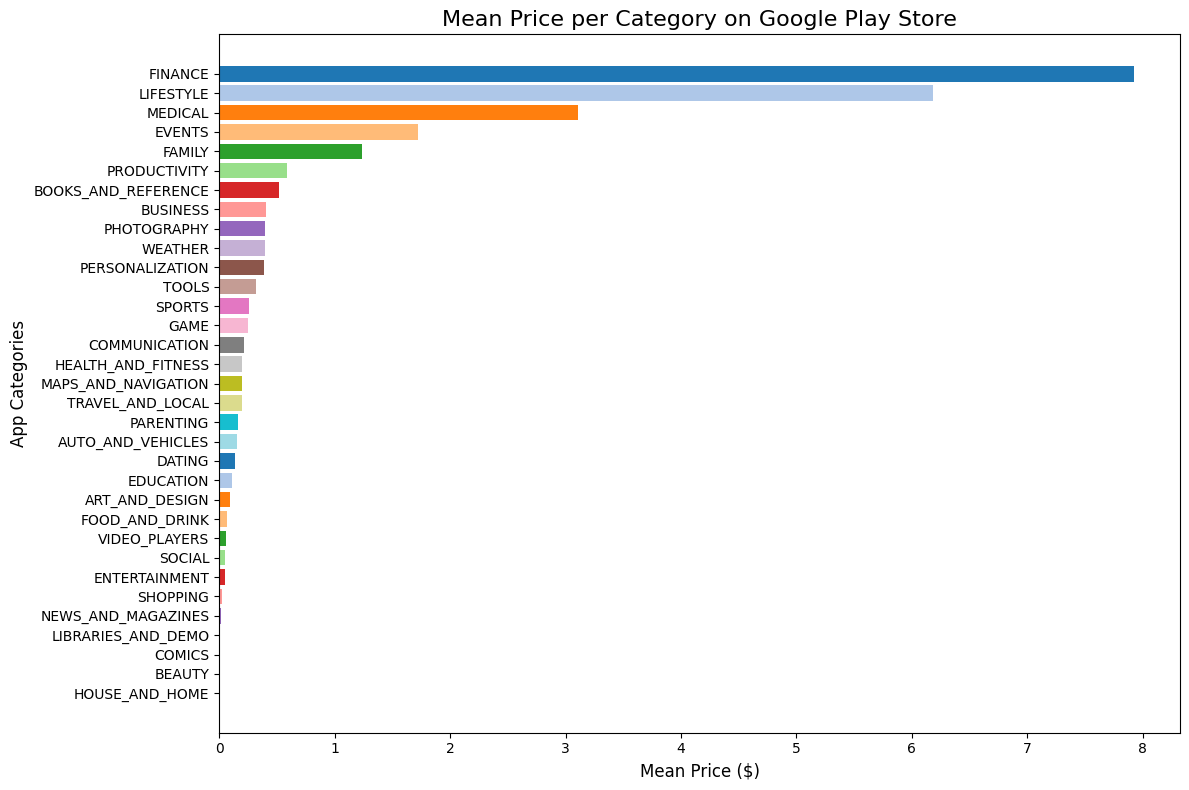

In [322]:
# Step 1: Clean the 'Price' column
gpsApps['Price'] = gpsApps['Price'].replace('[\$,]', '', regex=True).astype(float)

# Step 2: Group by 'Category' and calculate the mean price for each category
category_mean_price = gpsApps.groupby('Category')['Price'].mean()

# Step 3: Sort the categories by mean price
category_mean_price_sorted = category_mean_price.sort_values(ascending=False)

# Step 4: Generate a color palette for the bars
colors = plt.cm.tab20.colors[:len(category_mean_price_sorted)]  # Use tab20 color palette for distinct colors

# Step 5: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(category_mean_price_sorted.index, category_mean_price_sorted.values, color=colors)
plt.xlabel('Mean Price ($)', fontsize=12)
plt.ylabel('App Categories', fontsize=12)
plt.title('Mean Price per Category on Google Play Store', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


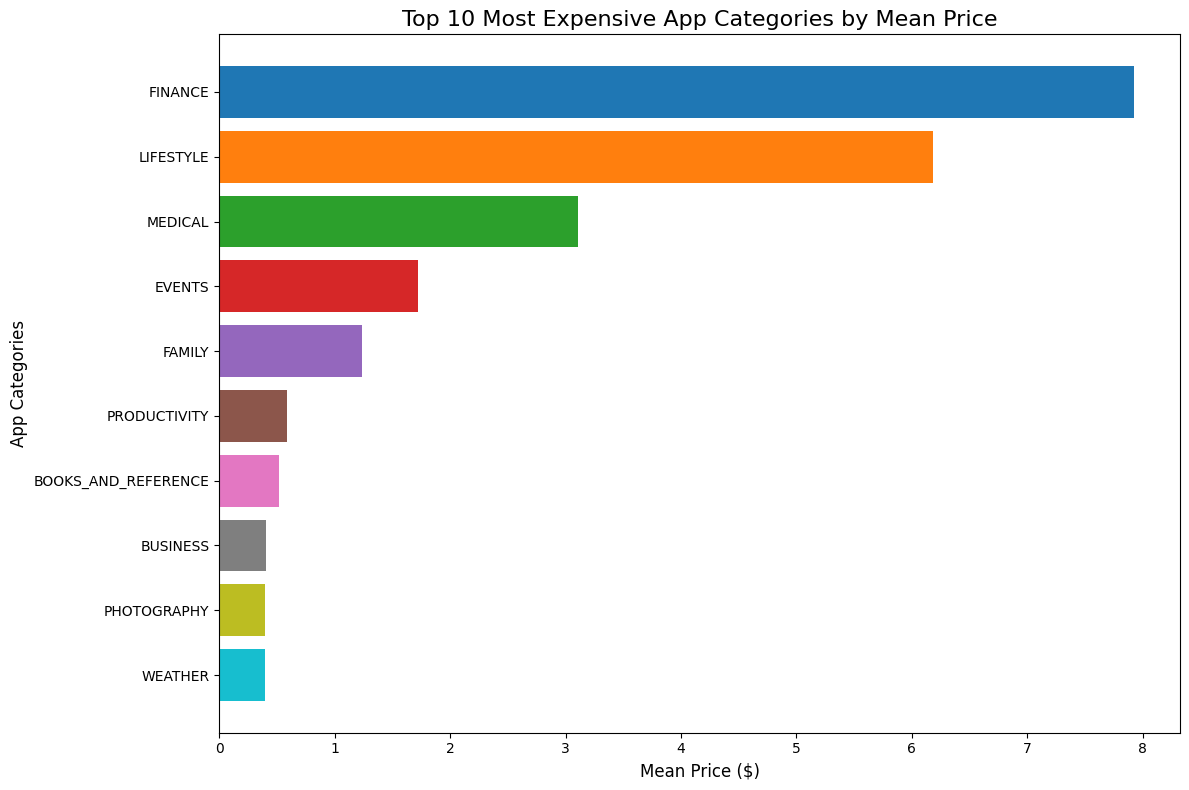

In [323]:
# Step 1: Clean the 'Price' column
gpsApps['Price'] = gpsApps['Price'].replace('[\$,]', '', regex=True).astype(float)

# Step 2: Group by 'Category' and calculate the mean price for each category
category_mean_price = gpsApps.groupby('Category')['Price'].mean()

# Step 3: Sort the categories by mean price in descending order and select the top 10
category_mean_price_sorted = category_mean_price.sort_values(ascending=False).head(10)

# Step 4: Generate a color palette for the top 10 categories
colors = plt.cm.tab10.colors[:len(category_mean_price_sorted)]  # Use tab10 color palette for distinct colors

# Step 5: Plot a horizontal bar chart for the top 10 categories
plt.figure(figsize=(12, 8))
plt.barh(category_mean_price_sorted.index, category_mean_price_sorted.values, color=colors)
plt.xlabel('Mean Price ($)', fontsize=12)
plt.ylabel('App Categories', fontsize=12)
plt.title('Top 10 Most Expensive App Categories by Mean Price', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


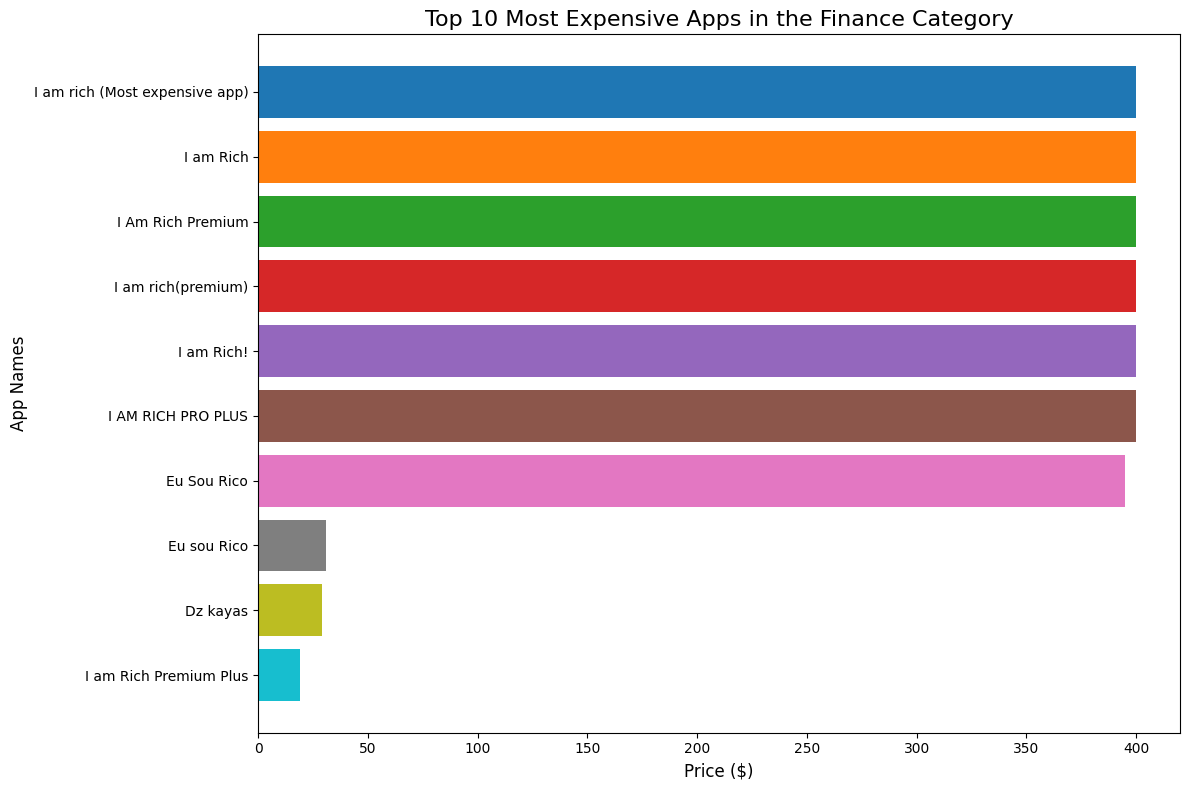

In [324]:
# Step 1: Clean the 'Price' column (remove dollar sign and commas)
gpsApps['Price'] = gpsApps['Price'].replace('[\$,]', '', regex=True).astype(float)

# Step 2: Filter the dataset for apps in the 'Finance' category
finance_apps = gpsApps[gpsApps['Category'] == 'FINANCE']

# Step 3: Sort the apps by 'Price' in descending order and select the top 10
top_10_finance_apps = finance_apps.sort_values(by='Price', ascending=False).head(10)

# Step 4: Generate a color palette with distinct colors for each bar
colors = plt.cm.tab10.colors[:len(top_10_finance_apps)]  # Get distinct colors from the tab10 palette

# Step 5: Plot a horizontal bar chart for the top 10 finance apps and their prices
plt.figure(figsize=(12, 8))
plt.barh(top_10_finance_apps['App'], top_10_finance_apps['Price'], color=colors)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('App Names', fontsize=12)
plt.title('Top 10 Most Expensive Apps in the Finance Category', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()
plt.show()


A bar chart visualized the mean price of apps per category. This data can be useful in understanding the pricing strategy across different categories. Certain categories have a higher average price, indicating that users might be willing to pay more for apps in these categories. According to plots above; the FINANCE, LIFESTYLE, MEDICAL, EVENTS, and FAMILY categories have the highest mean price. However, for all categories, the mean price is below $2.

# Visualization of App Ratings

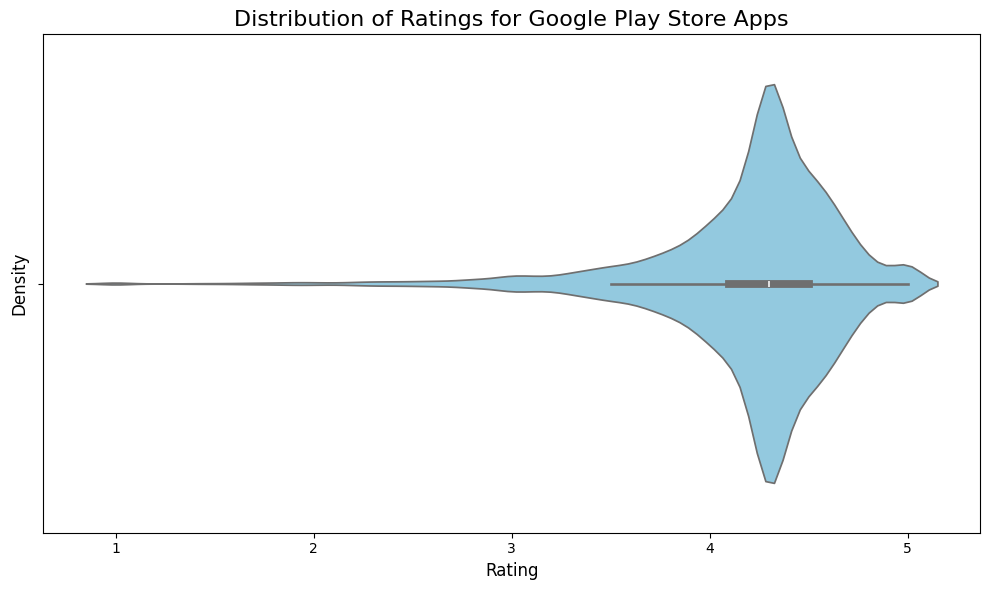

In [325]:
# Step 1: Clean the 'Rating' column to ensure it's numeric
gpsApps['Rating'] = pd.to_numeric(gpsApps['Rating'], errors='coerce')

# Step 2: Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=gpsApps, x='Rating', color='skyblue')

# Step 3: Customize the plot
plt.title('Distribution of Ratings for Google Play Store Apps', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Step 4: Show the plot
plt.tight_layout()
plt.show()


The violin plot above shows the distribution density of Google play store apps Ratings (ranked from 1 to 5). It can be deduced that a majority of apps have a rating of 4 and up, which is quite high.

This suggests that users typically give positive ratings to apps on the Google Play Store. The prevalence of high ratings may stem from factors like users generally chosing to install apps with good reviews and ratings, or poorly rated apps being quickly updated or removed.

For developers, this insight is crucial as it highlights the high expectations of users and the importance of maintaining high-quality standards to succeed in the google play store marketplace.

# Exploring Correlations

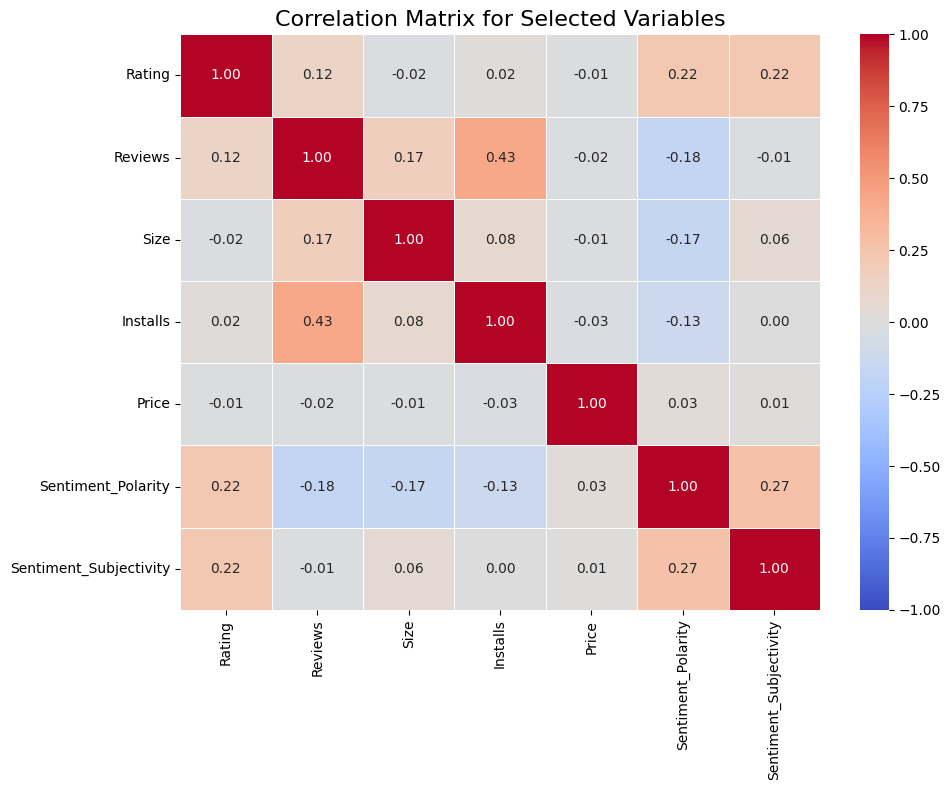

In [333]:
# Step 1: Clean the relevant columns
# Clean 'Price' column: Remove dollar signs and commas
gpsAppsCombined['Price'] = gpsAppsCombined['Price'].replace('[\$,]', '', regex=True).astype(float)

# Clean 'Size' column: Remove non-numeric characters, keep the numeric value
# Replace non-numeric values (like "Varies with device") with NaN and extract valid numeric sizes
gpsAppsCombined['Size'] = gpsAppsCombined['Size'].replace(r'[^\d.]+', '', regex=True)
gpsAppsCombined['Size'] = pd.to_numeric(gpsAppsCombined['Size'], errors='coerce')

# Clean 'Reviews' column: Convert to numeric, coercing errors to NaN
gpsAppsCombined['Reviews'] = pd.to_numeric(gpsAppsCombined['Reviews'], errors='coerce')

# Clean 'Installs' column: Remove commas and '+' symbols, then convert to numeric
gpsAppsCombined['Installs'] = gpsAppsCombined['Installs'].replace('[\+,]', '', regex=True).astype(int)

# Clean 'Sentiment_Polarity' and 'Sentiment_Subjectivity' columns: Convert to numeric
gpsAppsCombined['Sentiment_Polarity'] = pd.to_numeric(gpsAppsCombined['Sentiment_Polarity'], errors='coerce')
gpsAppsCombined['Sentiment_Subjectivity'] = pd.to_numeric(gpsAppsCombined['Sentiment_Subjectivity'], errors='coerce')

# Step 2: Select the relevant columns for correlation
columns_to_consider = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
gps_apps_corr = gpsAppsCombined[columns_to_consider]

# Step 3: Calculate the correlation matrix
correlation_matrix = gps_apps_corr.corr()

# Step 4: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Variables', fontsize=16)
plt.tight_layout()
plt.show()


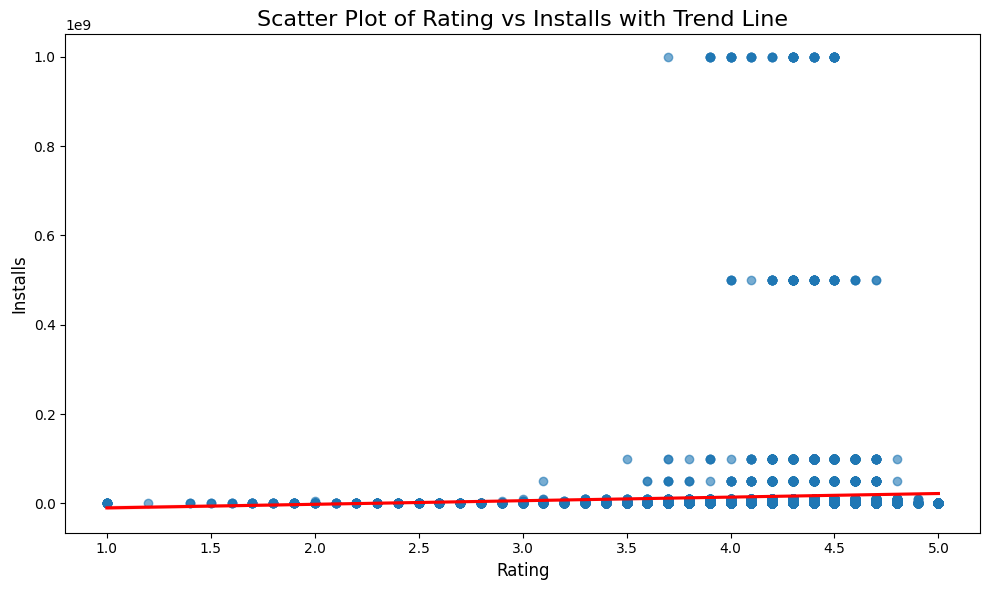

In [334]:
# Assuming gpsApps is your dataset
# Step 1: Clean the data by converting relevant columns to numeric values
gpsApps['Rating'] = pd.to_numeric(gpsApps['Rating'], errors='coerce')  # Convert 'Rating' to numeric, handle errors
gpsApps['Installs'] = gpsApps['Installs'].replace('[\+,]', '', regex=True)  # Clean 'Installs' column
gpsApps['Installs'] = pd.to_numeric(gpsApps['Installs'], errors='coerce')  # Convert 'Installs' to numeric

# Step 2: Plot the scatter plot with a trend line (regression line)
plt.figure(figsize=(10, 6))
sns.regplot(data=gpsApps, x='Rating', y='Installs', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})  # Add trend line

# Step 3: Customize the plot
plt.title('Scatter Plot of Rating vs Installs with Trend Line', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Installs', fontsize=12)

# Step 4: Show the plot
plt.tight_layout()
plt.show()


There is a positive correlation between app Rating and the number of installations. This further solidifies that apps with high rating usually get high number of installations.

This insight can be useful for developers to focus on building high-quality apps that will invoke the user to give them high ratings to boost their success in the play store marketplace.

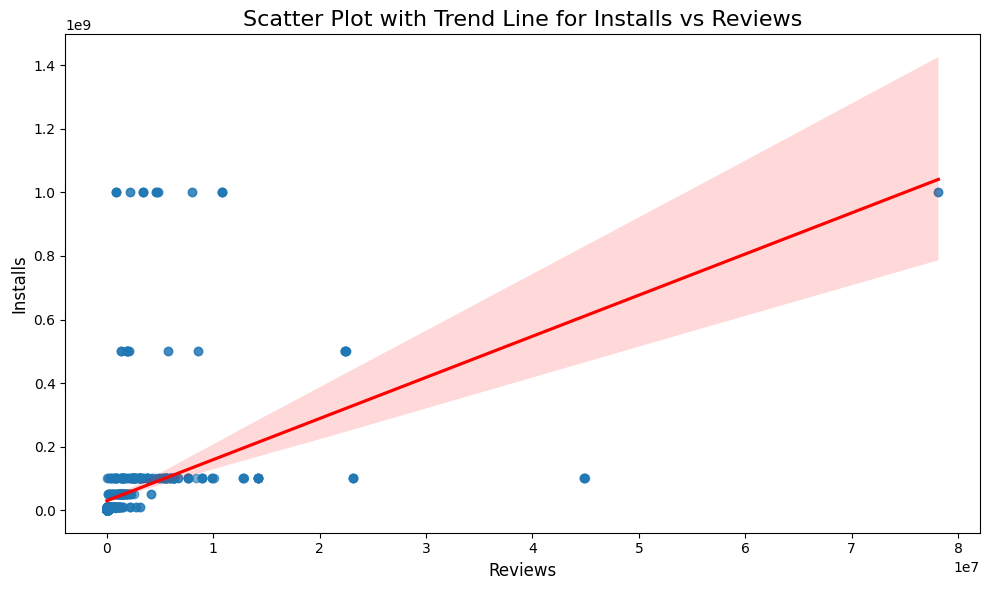

In [337]:
# Step 1: Clean the relevant columns (Price, Size, Reviews, Installs)
# Clean 'Price' column: Remove dollar signs and commas
gpsAppsCombined['Price'] = gpsAppsCombined['Price'].replace('[\$,]', '', regex=True).astype(float)

# Clean 'Size' column: Remove non-numeric characters, keep the numeric value
# Replace non-numeric values (like "Varies with device") with NaN and extract valid numeric sizes
gpsAppsCombined['Size'] = gpsAppsCombined['Size'].replace(r'[^\d.]+', '', regex=True)
gpsAppsCombined['Size'] = pd.to_numeric(gpsAppsCombined['Size'], errors='coerce')

# Clean 'Reviews' column: Convert to numeric, coercing errors to NaN
gpsAppsCombined['Reviews'] = pd.to_numeric(gpsAppsCombined['Reviews'], errors='coerce')

# Clean 'Installs' column: Remove commas and '+' symbols, then convert to numeric
gpsAppsCombined['Installs'] = gpsAppsCombined['Installs'].replace('[\+,]', '', regex=True).astype(int)

# Step 2: Plot the scatter plot with a trend line for 'Installs' vs 'Reviews'
plt.figure(figsize=(10, 6))
sns.regplot(data=gpsAppsCombined, x='Reviews', y='Installs', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

# Step 3: Customize the plot
plt.title('Scatter Plot with Trend Line for Installs vs Reviews', fontsize=16)
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Installs', fontsize=12)

# Step 4: Show the plot
plt.tight_layout()
plt.show()


There is a clear positive correlation between app Reviews and the number of installations. This shows that better app reviews translate to more app installations.

This insight can be useful for developers to prompt users to give high ratings and positive reviews (feedback) on the google playstore  to further increase their success in the play store marketplace.

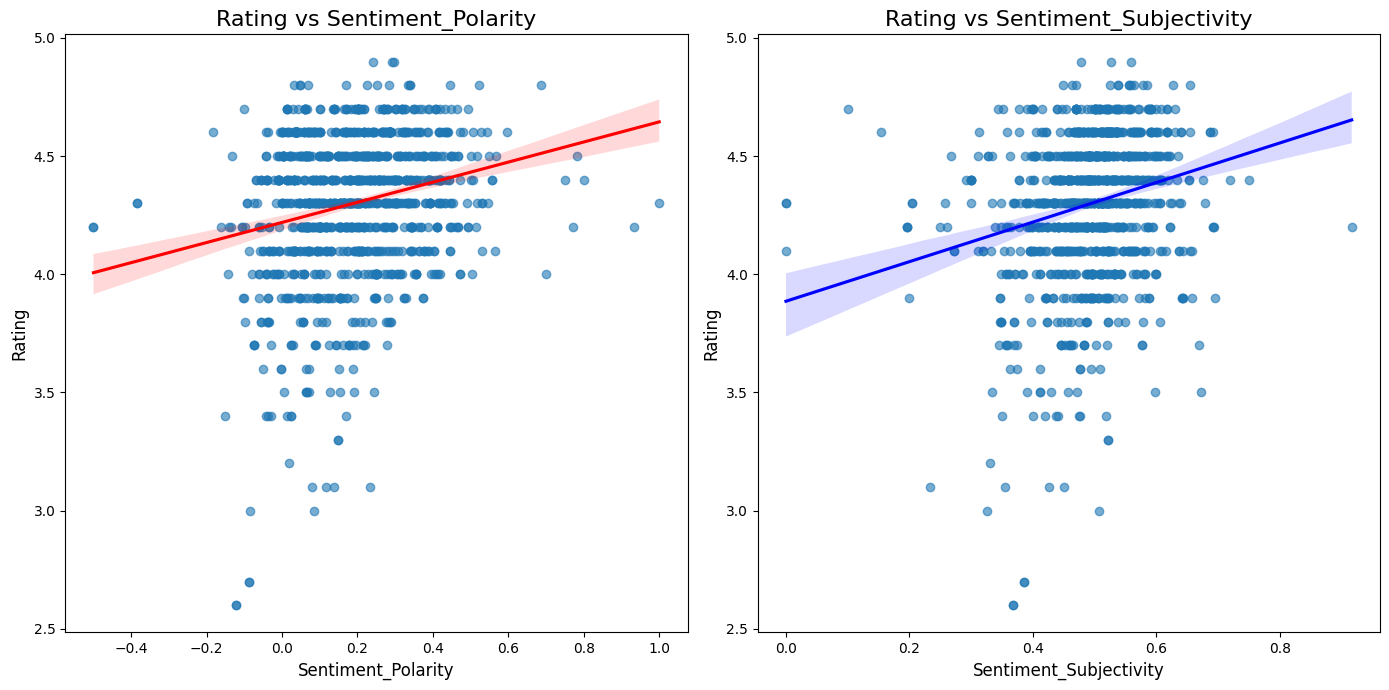

In [338]:
# Step 1: Clean the relevant columns (Price, Size, Reviews, Installs)
# Clean 'Price' column: Remove dollar signs and commas
gpsAppsCombined['Price'] = gpsAppsCombined['Price'].replace('[\$,]', '', regex=True).astype(float)

# Clean 'Size' column: Remove non-numeric characters, keep the numeric value
# Replace non-numeric values (like "Varies with device") with NaN and extract valid numeric sizes
gpsAppsCombined['Size'] = gpsAppsCombined['Size'].replace(r'[^\d.]+', '', regex=True)
gpsAppsCombined['Size'] = pd.to_numeric(gpsAppsCombined['Size'], errors='coerce')

# Clean 'Reviews' column: Convert to numeric, coercing errors to NaN
gpsAppsCombined['Reviews'] = pd.to_numeric(gpsAppsCombined['Reviews'], errors='coerce')

# Clean 'Installs' column: Remove commas and '+' symbols, then convert to numeric
gpsAppsCombined['Installs'] = gpsAppsCombined['Installs'].replace('[\+,]', '', regex=True).astype(int)

# Step 2: Plot the scatter plot with a trend line for 'Rating' vs 'Sentiment_Polarity'
plt.figure(figsize=(14, 7))

# Subplot 1: Rating vs Sentiment_Polarity
plt.subplot(1, 2, 1)
sns.regplot(data=gpsAppsCombined, x='Sentiment_Polarity', y='Rating', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Rating vs Sentiment_Polarity', fontsize=16)
plt.xlabel('Sentiment_Polarity', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Subplot 2: Rating vs Sentiment_Subjectivity
plt.subplot(1, 2, 2)
sns.regplot(data=gpsAppsCombined, x='Sentiment_Subjectivity', y='Rating', scatter_kws={'alpha':0.6}, line_kws={'color': 'blue'})
plt.title('Rating vs Sentiment_Subjectivity', fontsize=16)
plt.xlabel('Sentiment_Subjectivity', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()
plt.show()


The two graphs clearly show a positive correlation between app rating and both Sentiment Polarity and Sentiment Subjectivity.

Developers can use this insight to gain the knowledge that these two factors will directly affect the overall app rating which can translate to good or low number of installations and potentially the amount of earning they eventually accrue.

# Summary of Insights

# Insights

The analysis of the Google Play Store dataset revealed several key trends and patterns related to app popularity and pricing across various categories and genres. These insights offer valuable guidance for app developers and marketers in making informed decisions about app design, development, and pricing strategies.

Free apps dominate the markeplace in comparison to Paid apps. Developers can use this to make informed decision such as to make free apps, then make money by running ads on the apps, and via in-app purchases

The "FAMILY" category stands out as the most popular(based on number of applications available), followed by "GAME" and "TOOLS," highlighting the dominant genres in the app market. Notable apps in the "Family" category include Google Play Games and Minecraft.

The GAME, COMMUNICATION, PRODUCTIVITY, SOCIAL, and TOOLS categories make up 57.3% of all installations on the marketplace, with GAME leading with over 35 billion installations.

This visualization provids an overview of the categories that tend to attract a higher user base, thus providing a sense of the popularity of different categories.

Pricing varies between categories, with "Finance" and "Lifestyle" categories commanding the highest average prices.

Users tend to rate apps positively, underscoring the importance of maintaining high-quality standards.

A clear positive correlation is observed between the number of reviews and app installations.

# Conclusion
Both new and existing app developers need to consider mostly pricing, and app category when designing new apps because it will directly translate to the success they achieve in terms of app installations and potential revenue. The can bait users by offering free app installations, then run ads and in-app purachases to make money as users prefer free apps more and with high-quality apps, users will definitely upgrade or spend more money to unlock better app features.
